In [2]:
import numpy as np
import matplotlib.pyplot as plt
from algoritmer import bfgs
import tests as TEST


In [5]:
def conv_plot(y):
    plt.plot(np.log10(y))
    plt.title("Convergence",fontsize=26)
    plt.xlabel("Iterations",fontsize=16)
    plt.ylabel(r"$log \Vert E(X) \Vert $",fontsize=14)

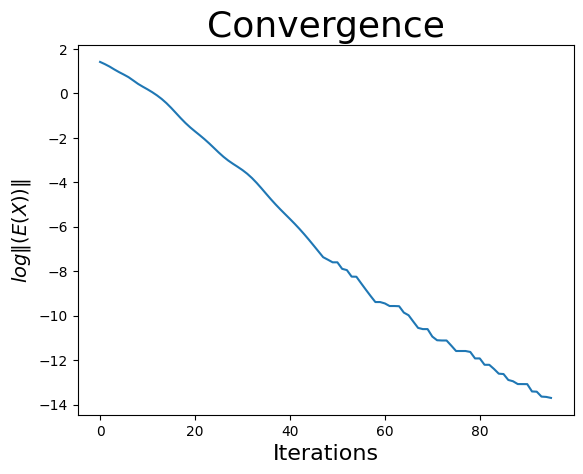

In [7]:
def conv_plot(y):
    plt.plot(np.log10(y))
    plt.title("Convergence",fontsize=26)
    plt.xlabel("Iterations",fontsize=16)
    plt.ylabel(r"$log \Vert E(X) \Vert $",fontsize=14)
ts =  TEST.P25

sol = np.array([
    [2, 2, -1.5],
    [-2, 2, -1.5],
    [-2, -2, -1.5],
    [2, -2, -1.5]
]).flatten()

x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=1000, convergence_sol=True, solution=sol)

conv_plot(conv)


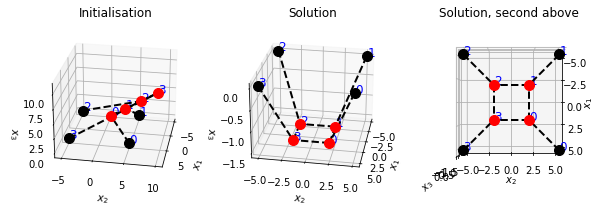

In [9]:
fig, ax = ts.plot(res,x0)
# if SAVE_TO_FILE:
#     plt.savefig("../Bilder/P25.pdf", bbox_inches='tight',pad_inches = 0) # Used in report.


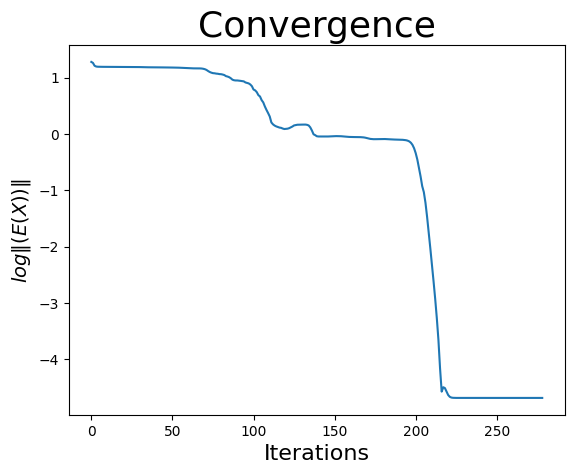

In [13]:
ts =  TEST.P69
s = 0.70970
t = 9.54287
sol = np.array([
    [-s, 0, t],
    [0, -s, t],
    [s, 0, t],
    [0, s, t]
]).flatten()

x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=1000, convergence_sol=True, solution=sol)
conv_plot(conv)

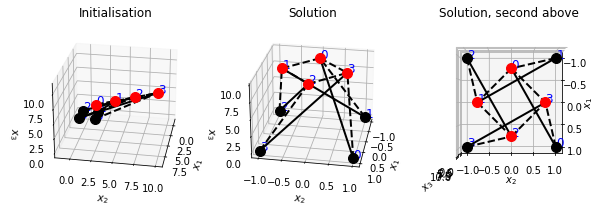

In [14]:
fig, ax = ts.plot(res, x0)

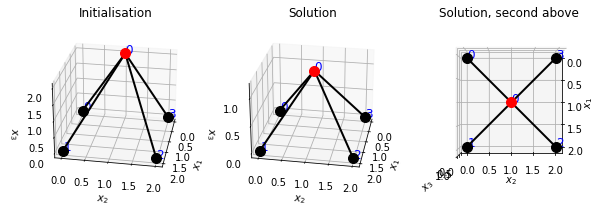

In [16]:
ts =  TEST.LOCALMIN
x0 = np.arange(3 * len(ts.free_weights))
res = bfgs(x0, ts.func, ts.grad, Niter=1000)
fig, ax = ts.plot(res, x0)


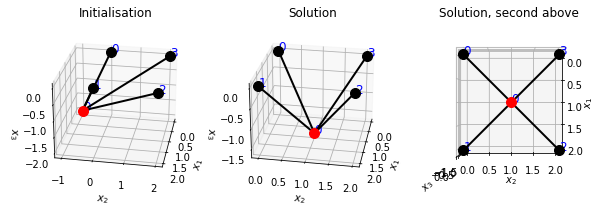

In [17]:
ts =  TEST.LOCALMIN
x0 = -np.arange(3 * len(ts.free_weights))
res = bfgs(x0, ts.func, ts.grad, Niter=1000)
fig, ax = ts.plot(res, x0)


 0: 1000, 1 
 1: 48, 1.5 
 2: 58, 18.0 
 3: 70, 216.0 
 4: 179, 2592.0 
 5: 49, 31104.0 
 6: 200, 373248.0 
 7: 420, 4478976.0 
 8: 48, 26873856.0 
 9: 39, 322486272.0 


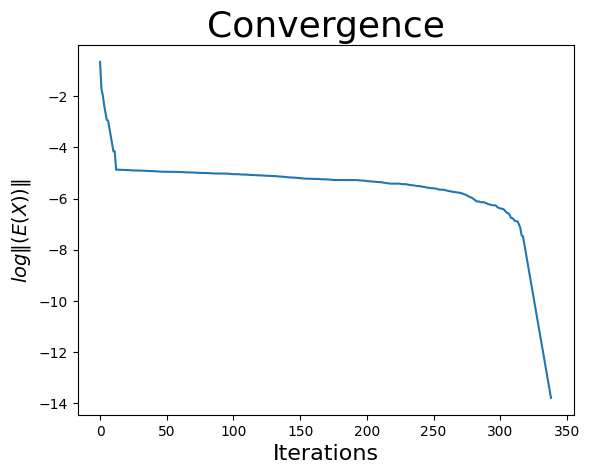

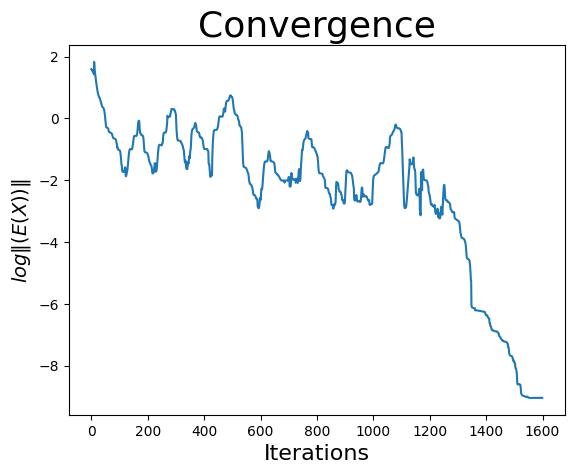

In [25]:
ts = TEST.SANITYCHECK
x0 = np.arange(3 * len(ts.free_weights))

mu = 1
prev = x0
for i in range(10):
    res, num = bfgs(prev, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    print(f'# of BFGS iterations: {num}\t mu: {mu} ')

    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    mu = min(mu, 1e10)

    if np.linalg.norm(res - prev) < 1e-12:
        break
    prev = res

sol = bfgs(res, ts.func(mu), ts.grad(mu), Niter=1000)
res, conv = bfgs(x0, ts.func(mu), ts.grad(mu), Niter=10000, convergence_sol=True, solution=sol)
conv_plot(conv)


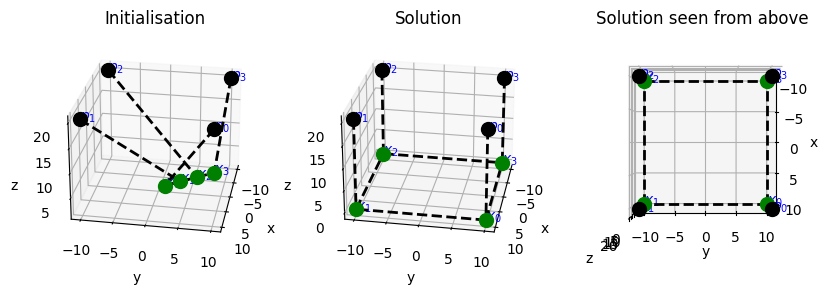

In [26]:
fig, ax = ts.plot(res, x0)

# of BFGS iterations: 827	 mu: 10 
# of BFGS iterations: 444	 mu: 30.0 
# of BFGS iterations: 521	 mu: 180.0 
# of BFGS iterations: 475	 mu: 540.0 
# of BFGS iterations: 468	 mu: 3240.0 
# of BFGS iterations: 539	 mu: 19440.0 
# of BFGS iterations: 420	 mu: 58320.0 
# of BFGS iterations: 236	 mu: 349920.0 
# of BFGS iterations: 1000	 mu: 524880.0 
# of BFGS iterations: 1000	 mu: 524880.0 


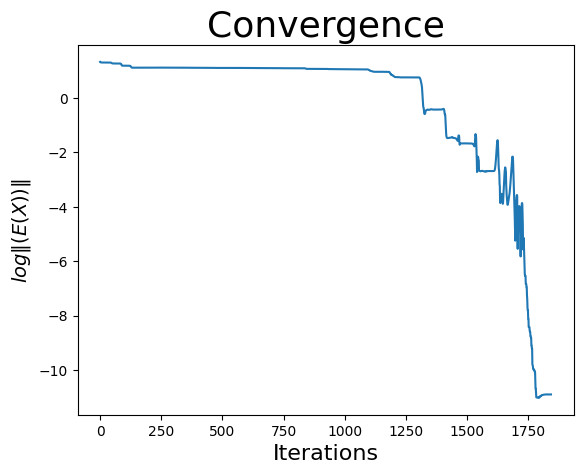

In [34]:
ts = TEST.FREESTANDING
# x0 = np.arange(3 * len(ts.free_weights))

x0 = np.random.uniform(0, 10, size=(3 * len(ts.free_weights)))

mu = 10
prev = x0
for i in range(10):
    res, num = bfgs(prev, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    print(f'# of BFGS iterations: {num}\t mu: {mu} ')

    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    mu = min(mu, 524880.0)

    if np.linalg.norm(res - prev) < 1e-12:
        break
    prev = res

sol = bfgs(res, ts.func(mu), ts.grad(mu), Niter=10000)
res, conv = bfgs(x0, ts.func(mu), ts.grad(mu), Niter=10000, convergence_sol=True, solution=sol)

conv_plot(conv)

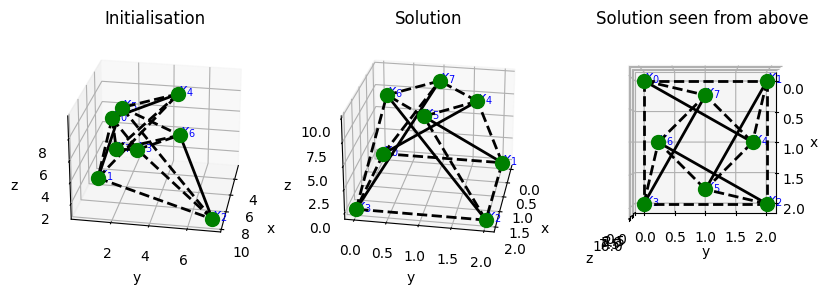

In [35]:
fig, ax = ts.plot(res, x0)

[1, 1, 1, 1, 8, 8, 8, 8, 1, 1, 1, 1, 8, 8, 8, 8, 1, 1, 1, 1]
[10, 10, 10, 10, 10, 10, 10, 10]
[]
12
# of BFGS iterations: 1000	 mu: 1 
# of BFGS iterations: 927	 mu: 1.5 
# of BFGS iterations: 682	 mu: 4.5 
# of BFGS iterations: 856	 mu: 13.5 
# of BFGS iterations: 730	 mu: 40.5 
# of BFGS iterations: 754	 mu: 121.5 
# of BFGS iterations: 899	 mu: 364.5 
# of BFGS iterations: 768	 mu: 1093.5 
# of BFGS iterations: 652	 mu: 3280.5 
# of BFGS iterations: 1000	 mu: 9841.5 


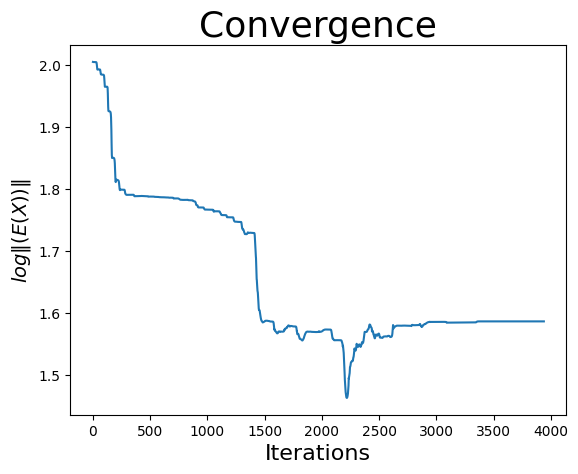

In [43]:
ts = TEST.STORIES(2)
x0 = np.arange(3 * len(ts.free_weights))

mu = 1
prev = x0
for i in range(10):
    res, num = bfgs(prev, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    print(f'# of BFGS iterations: {num}\t mu: {mu} ')

    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    mu = min(mu, 1e10)

    if np.linalg.norm(res - prev) < 1e-12:
        break

    prev = res

res = bfgs(res, ts.func(mu), ts.grad(mu), Niter=1000)
conv_plot(conv)

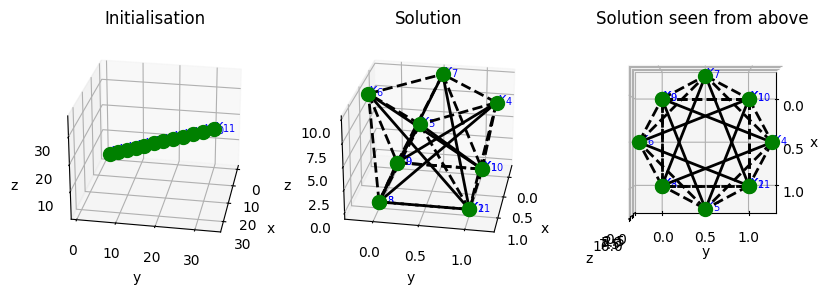

In [42]:
fig, ax = ts.plot(res, x0)